# 온라인 쇼핑 동향 확인 
- 상품군별_판매매체별(인터넷쇼핑/모바일쇼핑) 거래액 2019.02-2019.05 data 와 2020.02-2020.05 data 를 분석

## import 및 설정 하기

In [59]:
import datetime
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm

In [60]:
sns.set_style("whitegrid")

font_location = "C:\Windows\Fonts/NanumGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc("font", family=font_name)
mpl.rcParams["font.family"]
mpl.matplotlib_fname()

'C:\\Users\\Jisoo\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

### 1. 2019.02-2019.05 data read

In [1]:
online_2019_data = pd.read_csv("온라인쇼핑몰_판매매체별_상품군별거래액_2019.02_2019.07.csv", encoding = 'ANSI')

In [2]:
online_2019_data

,상품군별,판매매체별,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2020 2/4 p)
0,합계,계,9607307,11259178,10671636,11253413,10604209,11197264,37492594
1,합계,인터넷쇼핑,3397801,4154481,3945263,4067849,3709250,3951331,12272486
2,합계,모바일쇼핑,6209506,7104697,6726373,7185564,6894959,7245933,25220108
3,컴퓨터 및 주변기기,계,540004,530200,466943,437182,386397,440060,1770708
4,컴퓨터 및 주변기기,인터넷쇼핑,303189,311334,277452,261773,238393,268417,1036131
...,...,...,...,...,...,...,...,...,...
67,기타서비스,인터넷쇼핑,27781,27173,27623,32650,31068,32809,120686
68,기타서비스,모바일쇼핑,31458,36403,34762,43088,42031,51394,178003
69,기타,계,267559,386739,250508,251465,208820,231253,1073252
70,기타,인터넷쇼핑,132183,228817,126663,120807,92063,99074,446067


### 2. 2020.02-2020.05 data read

In [3]:
online_2020_data = pd.read_csv("온라인쇼핑몰_판매매체별_상품군별거래액_2020.02_2020.07.csv", encoding = 'ANSI')

In [4]:
online_2020_data

,상품군별,판매매체별,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06 p),2020. 07 p)
0,합계,계,11963252,12624728,12065537,12742648,12684409,12962537
1,합계,인터넷쇼핑,3850850,4138678,4023773,4056283,4192430,4179253
2,합계,모바일쇼핑,8112402,8486051,8041765,8686365,8491978,8783284
3,컴퓨터 및 주변기기,계,616468,687759,645276,590327,535105,608869
4,컴퓨터 및 주변기기,인터넷쇼핑,341426,387538,364862,349022,322247,367476
...,...,...,...,...,...,...,...,...
67,기타서비스,인터넷쇼핑,59394,27840,45916,35082,39688,38085
68,기타서비스,모바일쇼핑,86230,36702,68617,54803,54583,61225
69,기타,계,380936,387031,318471,389398,365383,389308
70,기타,인터넷쇼핑,162845,185529,136878,162870,146319,149514


#### online 2019/2020 상품군별 비교

In [5]:
online_2020_data["상품군별"].unique()

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       'e쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [8]:
online_2019_data["상품군별"].unique()

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '서적', '사무·문구', '의복', '신발', '가방',
       '패션용품 및 액세서리', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품', '농축수산물',
       '생활용품', '자동차 및 자동차용품', '가구', '애완용품', '여행 및 교통서비스', '문화 및 레저서비스',
       'e쿠폰서비스', '음식서비스', '기타서비스', '기타'], dtype=object)

In [74]:
len(online_2019_data["상품군별"].unique()), len(online_2020_data["상품군별"].unique())

(24, 24)

##### 위의 23개의 상품군별 중 (합계 제외) 오프라인 쇼핑 거래와 비교하기 위해 식료품 상품군별만 뽑아 비교

### 3. 식료품 및 전체 2019년 2020년 쇼핑 거래액 비교
- 식료품 상품군 : 음식료품 / 농축수산물 / 음식 서비스
- online 식료품 별 2019 / 2020 data 하나로 concat

In [29]:
# 2019년 식료품 상품군만 뽑기
online_data = online_2019_data[online_2019_data["상품군별"].isin(["합계", "음·식료품", "농축수산물", "음식서비스"])]

In [61]:
# 2020년 식료품 상품군만 뽑기
online_2020_food = online_2020_data[online_2020_data["상품군별"].isin(["합계", "음·식료품", "농축수산물", "음식서비스"])]
online_2020_food.drop(columns=["상품군별", "판매매체별"], inplace = True)

In [122]:
online = pd.concat([online_data, online_2020_food], axis=1)

In [123]:
# 2019년의 2020 2/4 p 컬럼은 필요 없으니 삭제
online.drop(columns="2020 2/4 p)", inplace =True)
online = online.reset_index(drop=True)

In [124]:
# 2019.02-2019.05 와 2020.02-2020.05 총계 구하기.
online["2019_0205_총계"] = online.iloc[:, 2:6].sum(axis=1)
online["2020_0205_총계"] = online.iloc[:, 8:12].sum(axis=1)

In [87]:
# online_total.csv 저장 [2019, 2020 년 식료품 data]
online.to_csv("2019_2020_online_total.csv", index=False)

#### 1). 2019년 2020년 식료품 온라인 쇼핑 거래액_증감액 및 증감률 시각화

In [126]:
# 2019년 2020년 증감액 및 증감률 시각화를 위한 column 생성
online["증감액(백만원)"] = online["2020_0205_총계"] - online["2019_0205_총계"]
online["증감률(%)"] = online["증감액(백만원)"]/online["2019_0205_총계"]*100

In [127]:
online

,상품군별,판매매체별,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06 p),2020. 07 p),2019_0205_총계,2020_0205_총계,증감액(백만원),증감률(%)
0,합계,계,9607307,11259178,10671636,11253413,10604209,11197264,11963252,12624728,12065537,12742648,12684409,12962537,42791534,49396165,6604631,15.434434
1,합계,인터넷쇼핑,3397801,4154481,3945263,4067849,3709250,3951331,3850850,4138678,4023773,4056283,4192430,4179253,15565394,16069584,504190,3.239173
2,합계,모바일쇼핑,6209506,7104697,6726373,7185564,6894959,7245933,8112402,8486051,8041765,8686365,8491978,8783284,27226140,33326583,6100443,22.406566
3,음·식료품,계,867779,1026995,1059837,1108562,1041017,1089666,1481513,1631491,1520093,1477572,1450197,1598679,4063173,6110669,2047496,50.391554
4,음·식료품,인터넷쇼핑,276044,331854,351462,366378,339741,359413,411253,442142,422759,395190,410042,444190,1325738,1671344,345606,26.068952
5,음·식료품,모바일쇼핑,591735,695141,708375,742184,701275,730254,1070260,1189348,1097334,1082382,1040155,1154489,2737435,4439324,1701889,62.170937
6,농축수산물,계,221292,265904,271458,269992,256778,267508,448870,517150,468172,416900,414963,462137,1028646,1851092,822446,79.954231
7,농축수산물,인터넷쇼핑,63695,81773,86283,83828,74977,78163,136818,137870,142339,111239,126962,150199,315579,528266,212687,67.395803
8,농축수산물,모바일쇼핑,157598,184131,185175,186165,181801,189344,312052,379280,325833,305661,288001,311939,713069,1322826,609757,85.511641
9,음식서비스,계,616842,712110,687613,743966,775346,828720,1135018,1251923,1263018,1320396,1252411,1378014,2760531,4970355,2209824,80.050686


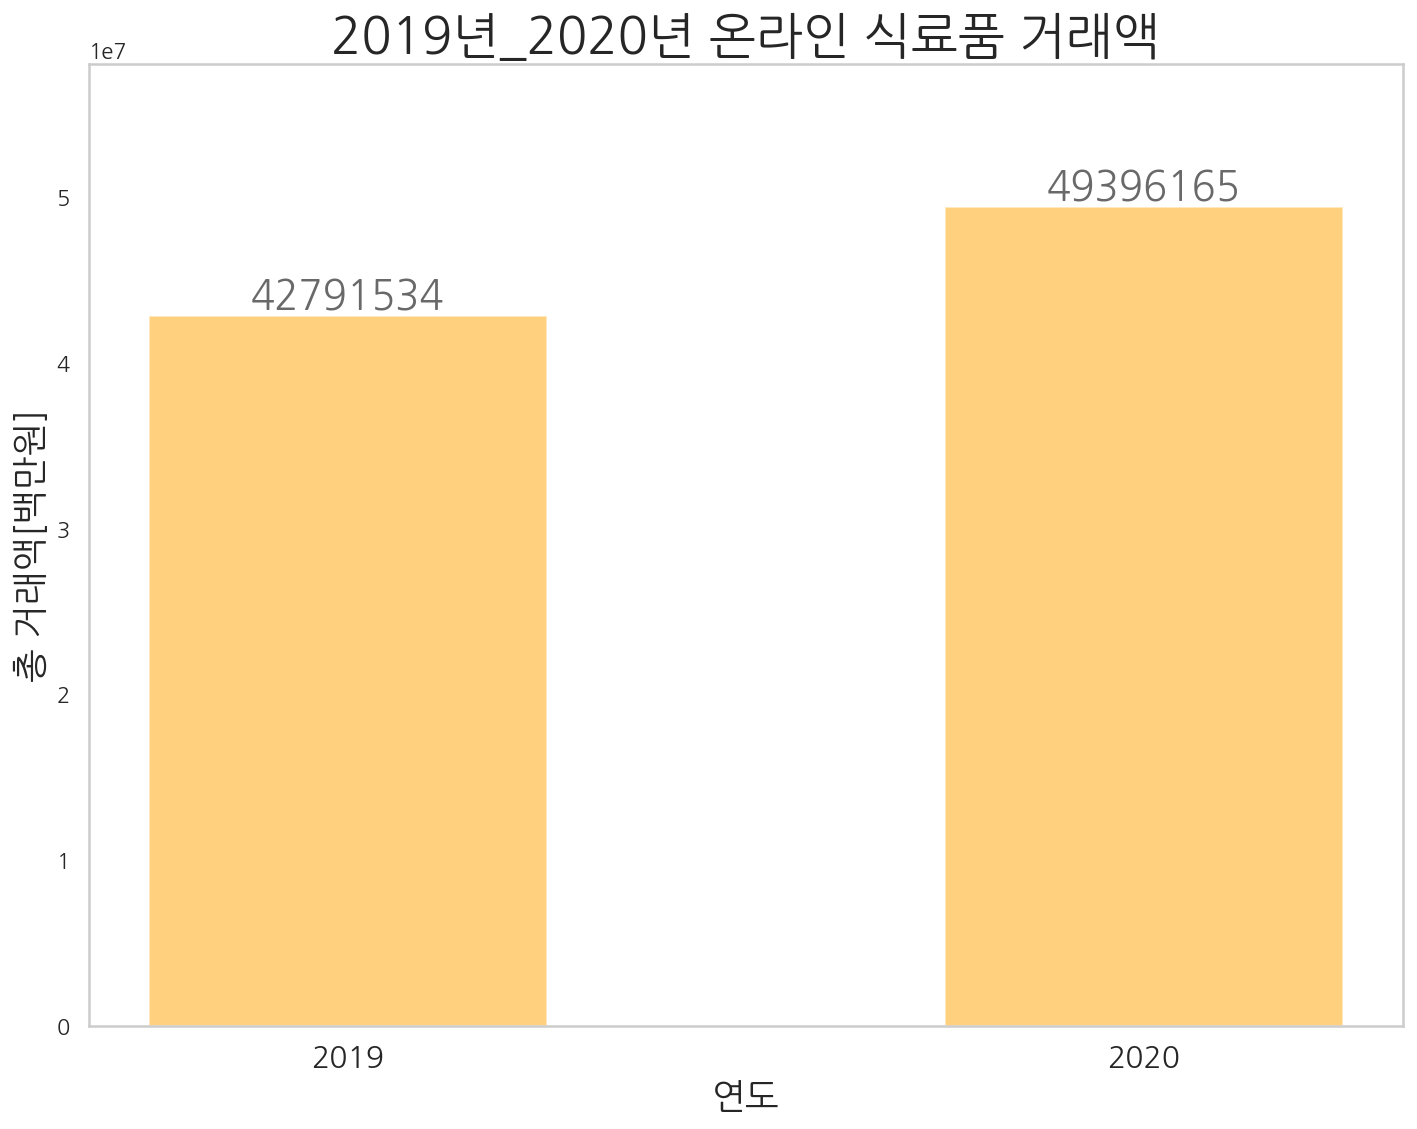

In [175]:
index = online.iloc[:, 14:16].columns
alpha = 0.5
plt.figure(figsize=(10,8))

plt.bar(index, online.iloc[0, 14:16], width = 0.5, align="center", color='orange', alpha = alpha)
plt.xticks(index, ["2019", "2020"], fontsize=15)
plt.title("2019년_2020년 온라인 식료품 거래액", fontsize=25)
plt.xlabel("연도", fontsize=18)
plt.ylabel("총 거래액[백만원]", fontsize=18)
plt.grid(False)
plt.tight_layout()
plt.ylim(0,58000000)

for x, y in enumerate(online.iloc[0, 14:16]):
    plt.text(x, y, y,fontsize=20, color='dimgray', horizontalalignment='center', verticalalignment='bottom')

plt.show()

- 온라인 식료품 분야 2020년 거래액이 2019년보다 6604631 백 만원 증가 하였으며 15.43% 증가했습니다.

In [139]:
d = pd.DataFrame({"연도" : ["2019", "2020"], "증감률" : [0. , 15.43]})

In [140]:
d

,연도,증감률
0,2019,0.00
1,2020,15.43


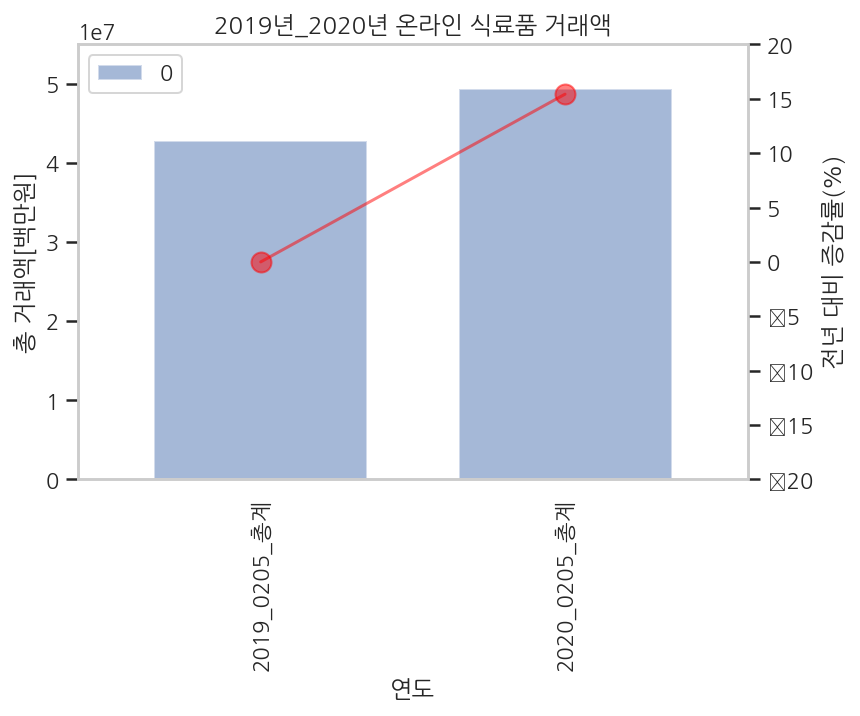

In [150]:
alpha = 0.5
index = online.iloc[0, 14:16]

ax1 = online.iloc[0, 14:16].plot(kind="bar", width=0.7, color='b', alpha=alpha)
ax2 = ax1.twinx()
ax2.plot(d.index, d["증감률"], marker='o', markersize=10, color='red', label='증감률', alpha=alpha)

ax1.set_ylim(0, 55000000)
ax2.set_ylim(-20, 20)

ax1.set_xlabel('연도')
ax1.set_ylabel('총 거래액[백만원]')
ax2.set_ylabel('전년 대비 증감률(%)')
#ax2.set_yticks(index, ["2019", "2020"])
ax1.grid(False)
ax2.grid(False)

plt.title('2019년_2020년 온라인 식료품 거래액')
ax1.legend(loc='upper left')
plt.show()

#### 2). 2019년 2020년 식료품별(음식료품, 농축산물, 음식서비스) 온라인 쇼핑 거래액_증감액 및 증감률 시각화

In [213]:
online_data = pd.read_csv("2019_2020_online_total.csv")

In [214]:
# 2019.02-2019.05 와 2020.02-2020.05 만 남기기
online_food_data = online_data.drop(columns = ["2019. 06", "2019. 07", "2020. 06 p)", "2020. 07 p)", "2019_0205_총계", "2020_0205_총계"])

In [215]:
online_food_data

,상품군별,판매매체별,2019. 02,2019. 03,2019. 04,2019. 05,2020. 02,2020. 03,2020. 04,2020. 05
0,합계,계,9607307,11259178,10671636,11253413,11963252,12624728,12065537,12742648
1,합계,인터넷쇼핑,3397801,4154481,3945263,4067849,3850850,4138678,4023773,4056283
2,합계,모바일쇼핑,6209506,7104697,6726373,7185564,8112402,8486051,8041765,8686365
3,음·식료품,계,867779,1026995,1059837,1108562,1481513,1631491,1520093,1477572
4,음·식료품,인터넷쇼핑,276044,331854,351462,366378,411253,442142,422759,395190
5,음·식료품,모바일쇼핑,591735,695141,708375,742184,1070260,1189348,1097334,1082382
6,농축수산물,계,221292,265904,271458,269992,448870,517150,468172,416900
7,농축수산물,인터넷쇼핑,63695,81773,86283,83828,136818,137870,142339,111239
8,농축수산물,모바일쇼핑,157598,184131,185175,186165,312052,379280,325833,305661
9,음식서비스,계,616842,712110,687613,743966,1135018,1251923,1263018,1320396


In [267]:
# 식료품 상품군별 연도_월별 총계 값만 남는 dataframe 만들기
online_food = pd.DataFrame({"음·식료품_2019":online_food_data[online_food_data["상품군별"]=="음·식료품"].iloc[0,2:6].values, 
                            "음·식료품_2020":online_food_data[online_food_data["상품군별"]=="음·식료품"].iloc[0,6:].values,
                            "농축수산물_2019":online_food_data[online_food_data["상품군별"]=="농축수산물"].iloc[0,2:6].values, 
                            "농축수산물_2020":online_food_data[online_food_data["상품군별"]=="농축수산물"].iloc[0,6:].values,
                            "음식서비스_2019":online_food_data[online_food_data["상품군별"]=="음식서비스"].iloc[0,2:6].values, 
                            "음식서비스_2020":online_food_data[online_food_data["상품군별"]=="음식서비스"].iloc[0,6:].values,
                            "연도":["2월", "3월", "4월", "5월"]})

In [268]:
online_food.set_index("연도", inplace=True)

In [269]:
online_food

,음·식료품_2019,음·식료품_2020,농축수산물_2019,농축수산물_2020,음식서비스_2019,음식서비스_2020
연도,,,,,,
2월,867779,1481513,221292,448870,616842,1135018
3월,1026995,1631491,265904,517150,712110,1251923
4월,1059837,1520093,271458,468172,687613,1263018
5월,1108562,1477572,269992,416900,743966,1320396


##### 식료품별 _연도별_월별 온라인 쇼핑거래 액 분석 시각화 함수

In [292]:
def plt_online_food(num1, num2, name):
    index = np.arange(4)
    alpha=0.5
    plt.figure(figsize=(18,9))
    bar_width=0.35
    ls = ["2월", "3월", "4월", "5월"]
    
    plt.bar(index, online_food.iloc[:, num1], bar_width, alpha=alpha, align="center", color='b')
    plt.bar(index+bar_width, online_food.iloc[:, num2], bar_width, alpha=alpha,align="center", color='r')
    
    plt.title("{} 온라인 거래액".format(name), fontsize=25)
    plt.xlabel("월", fontsize=18)
    plt.ylabel("거래액[백만원]", fontsize=18)
    plt.xticks(index+0.14, ls, fontsize=18)
    plt.grid(False)
    plt.legend(online_food.columns[num1:num2+1], loc="upper left")
    #plt.savefig("{} 온라인 거래액 연도별 비교.png".format(name), bbox_inches="tight")
    plt.tight_layout()
    plt.show()

##### 음·식료품 연도별_월별 온라인 쇼핑거래 액 분석 시각화

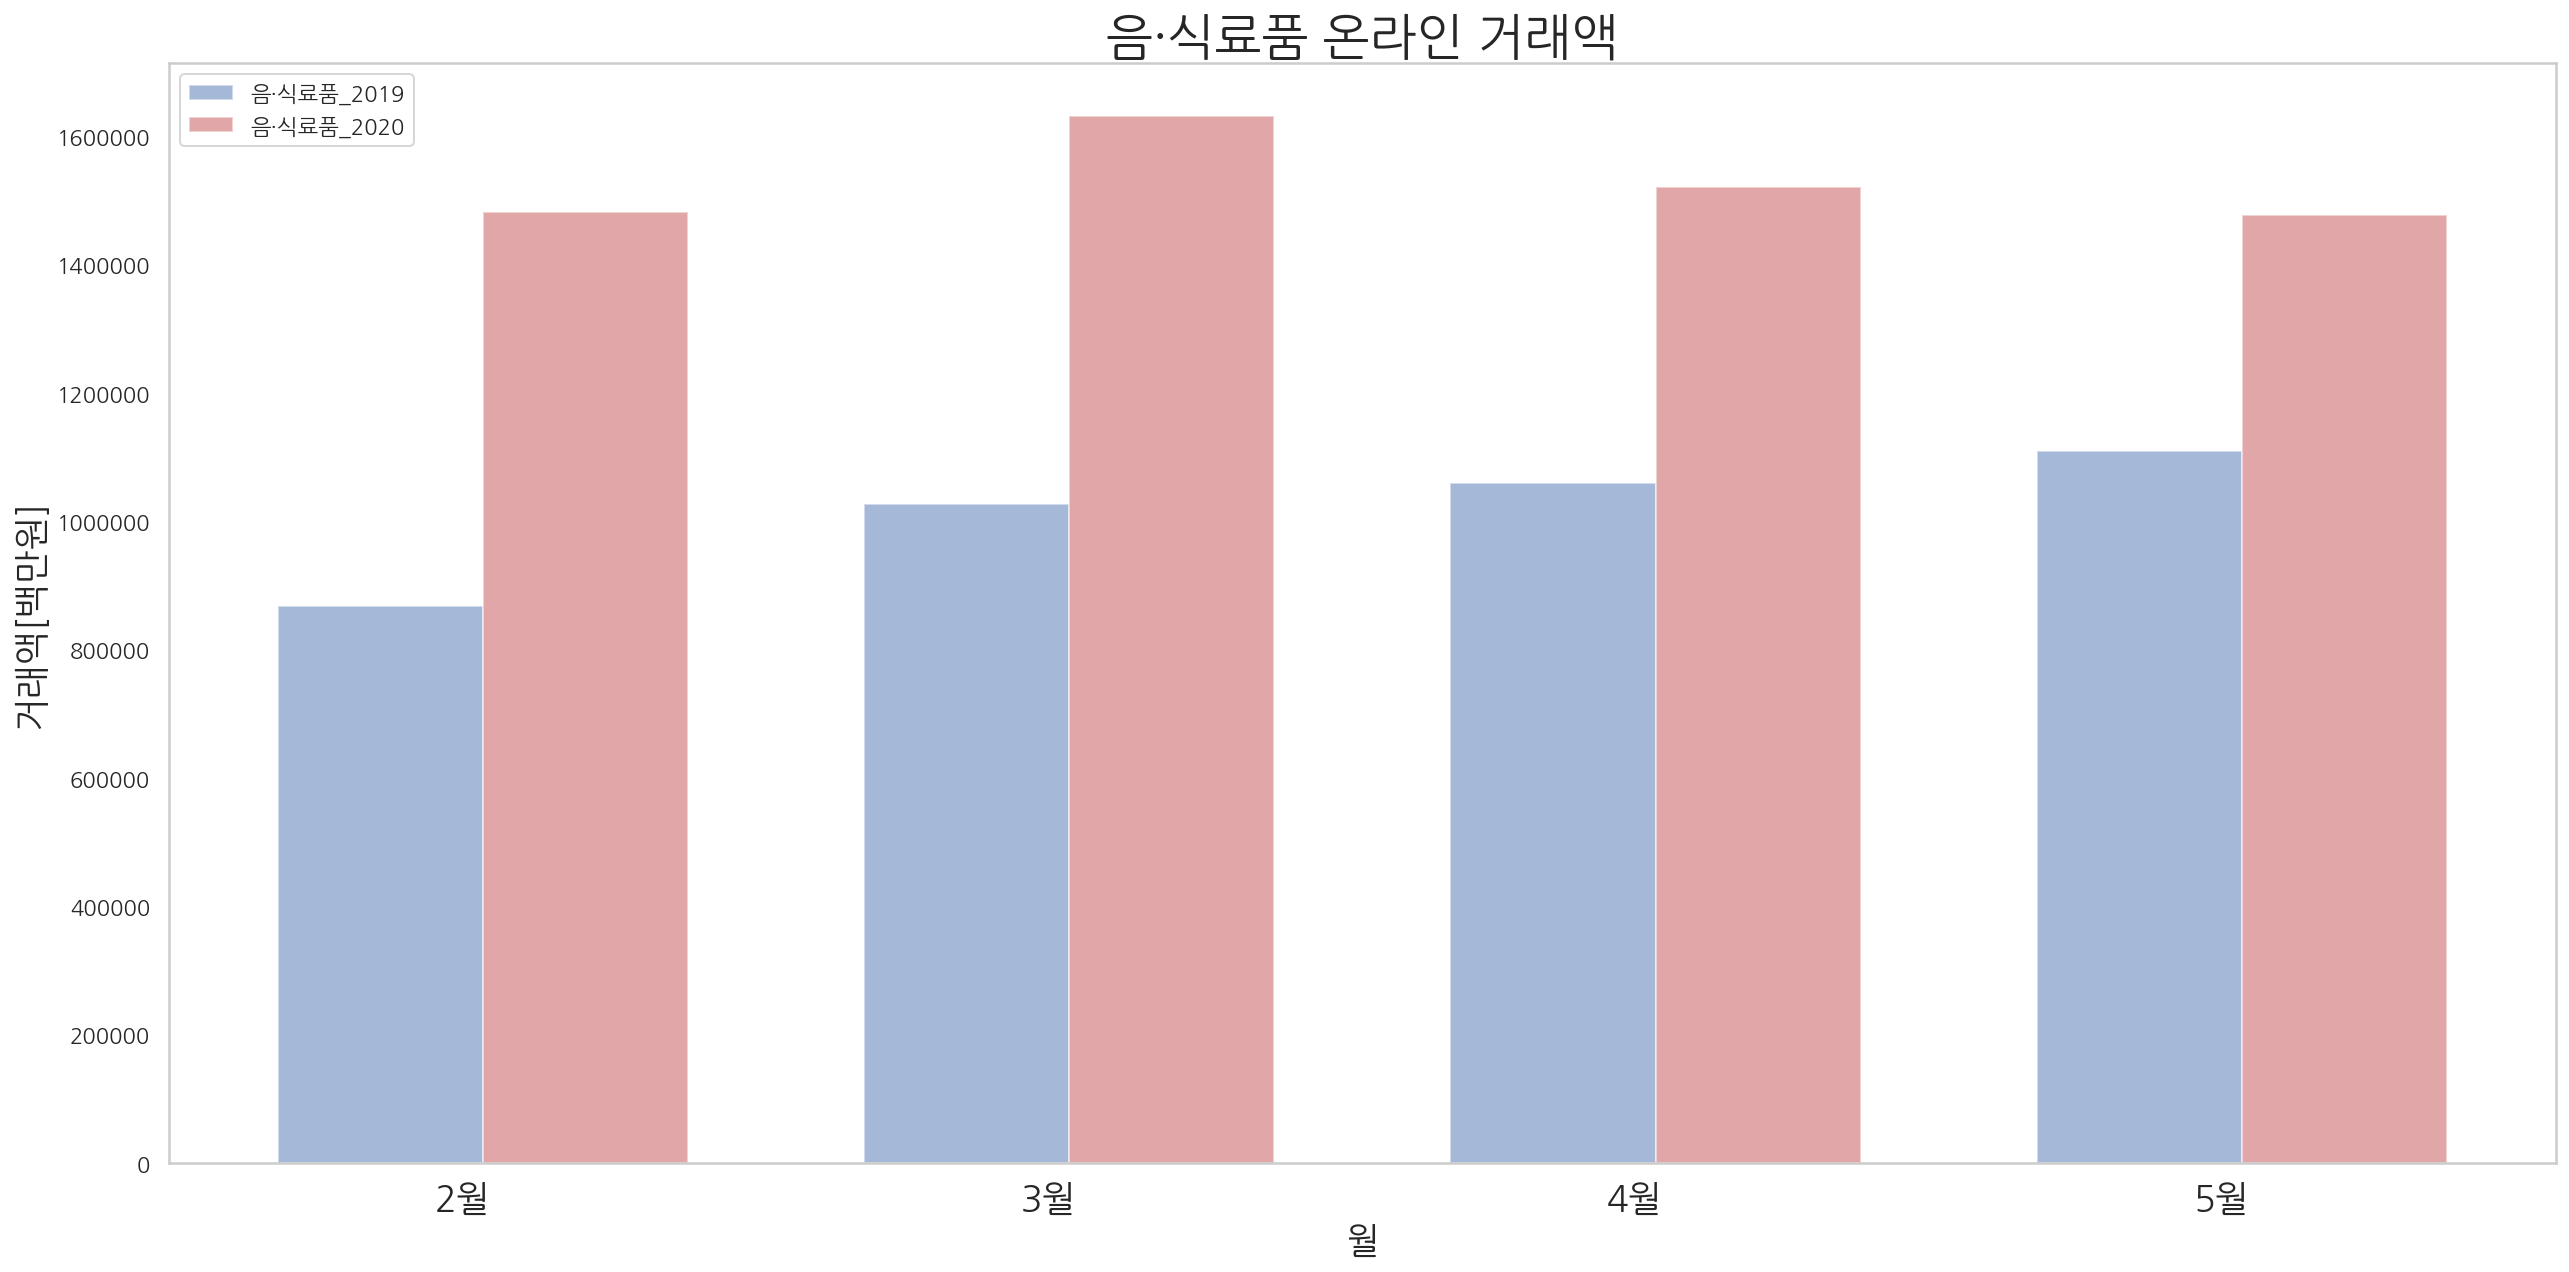

In [293]:
plt_online_food(0,1,"음·식료품")

##### 농축수산물 연도별_월별 온라인 쇼핑거래 액 분석 시각화

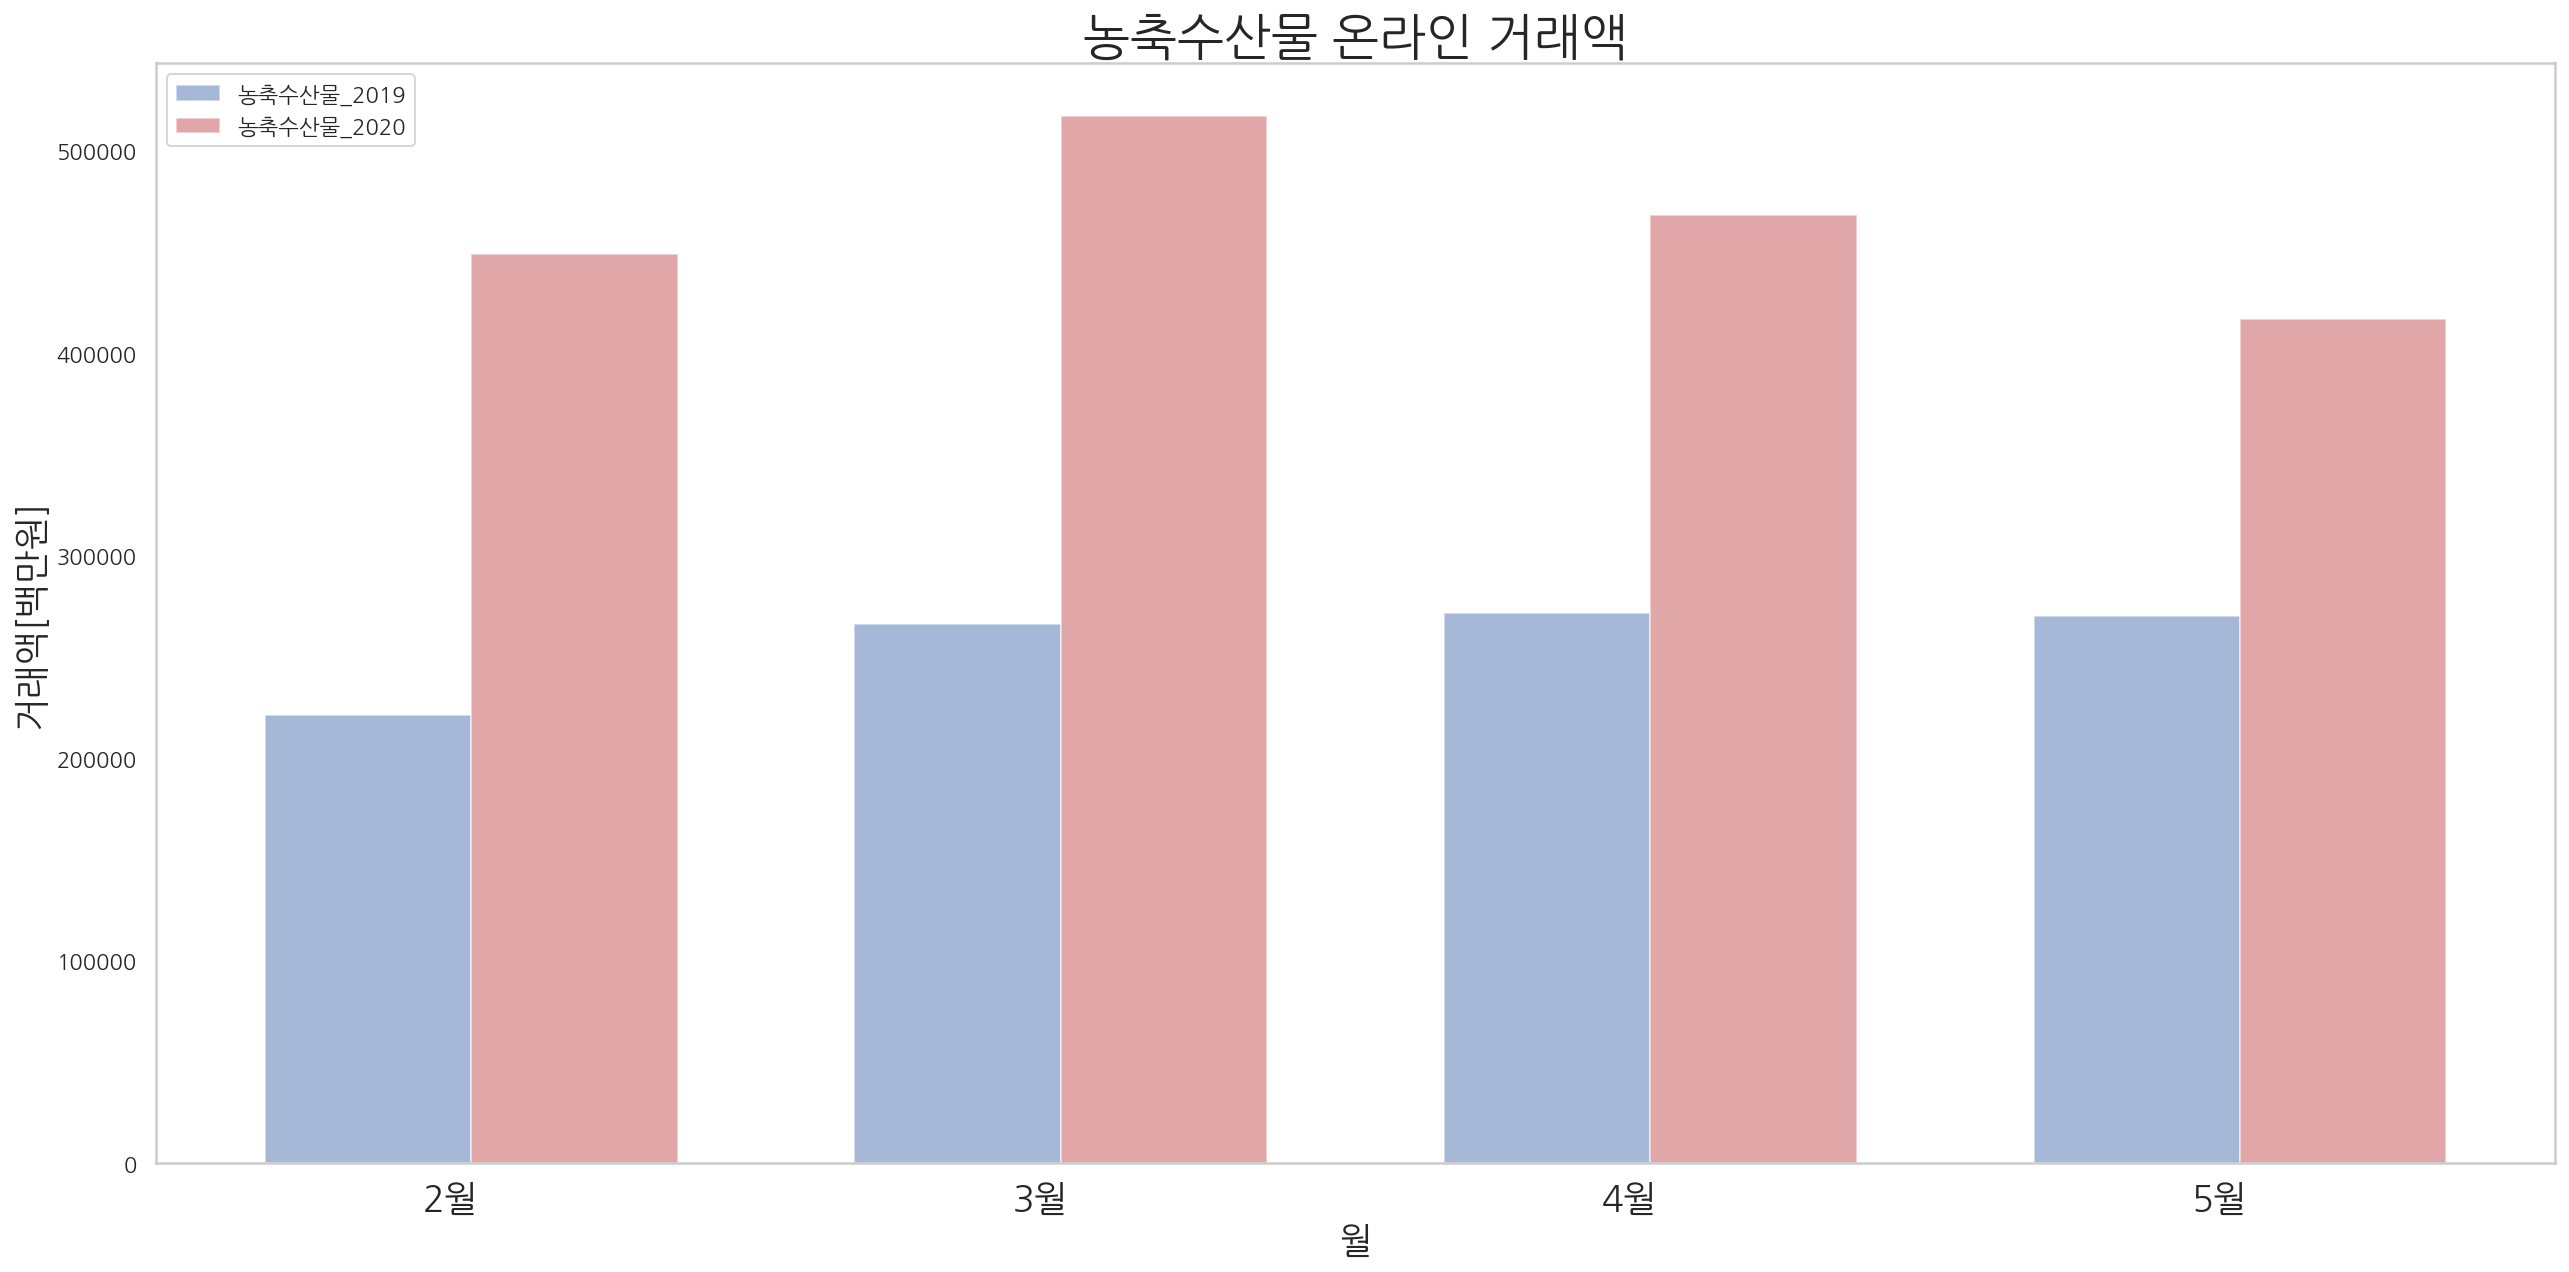

In [294]:
plt_online_food(2, 3, "농축수산물")

##### 음식서비스 연도별_월별 온라인 쇼핑거래 액 분석 시각화

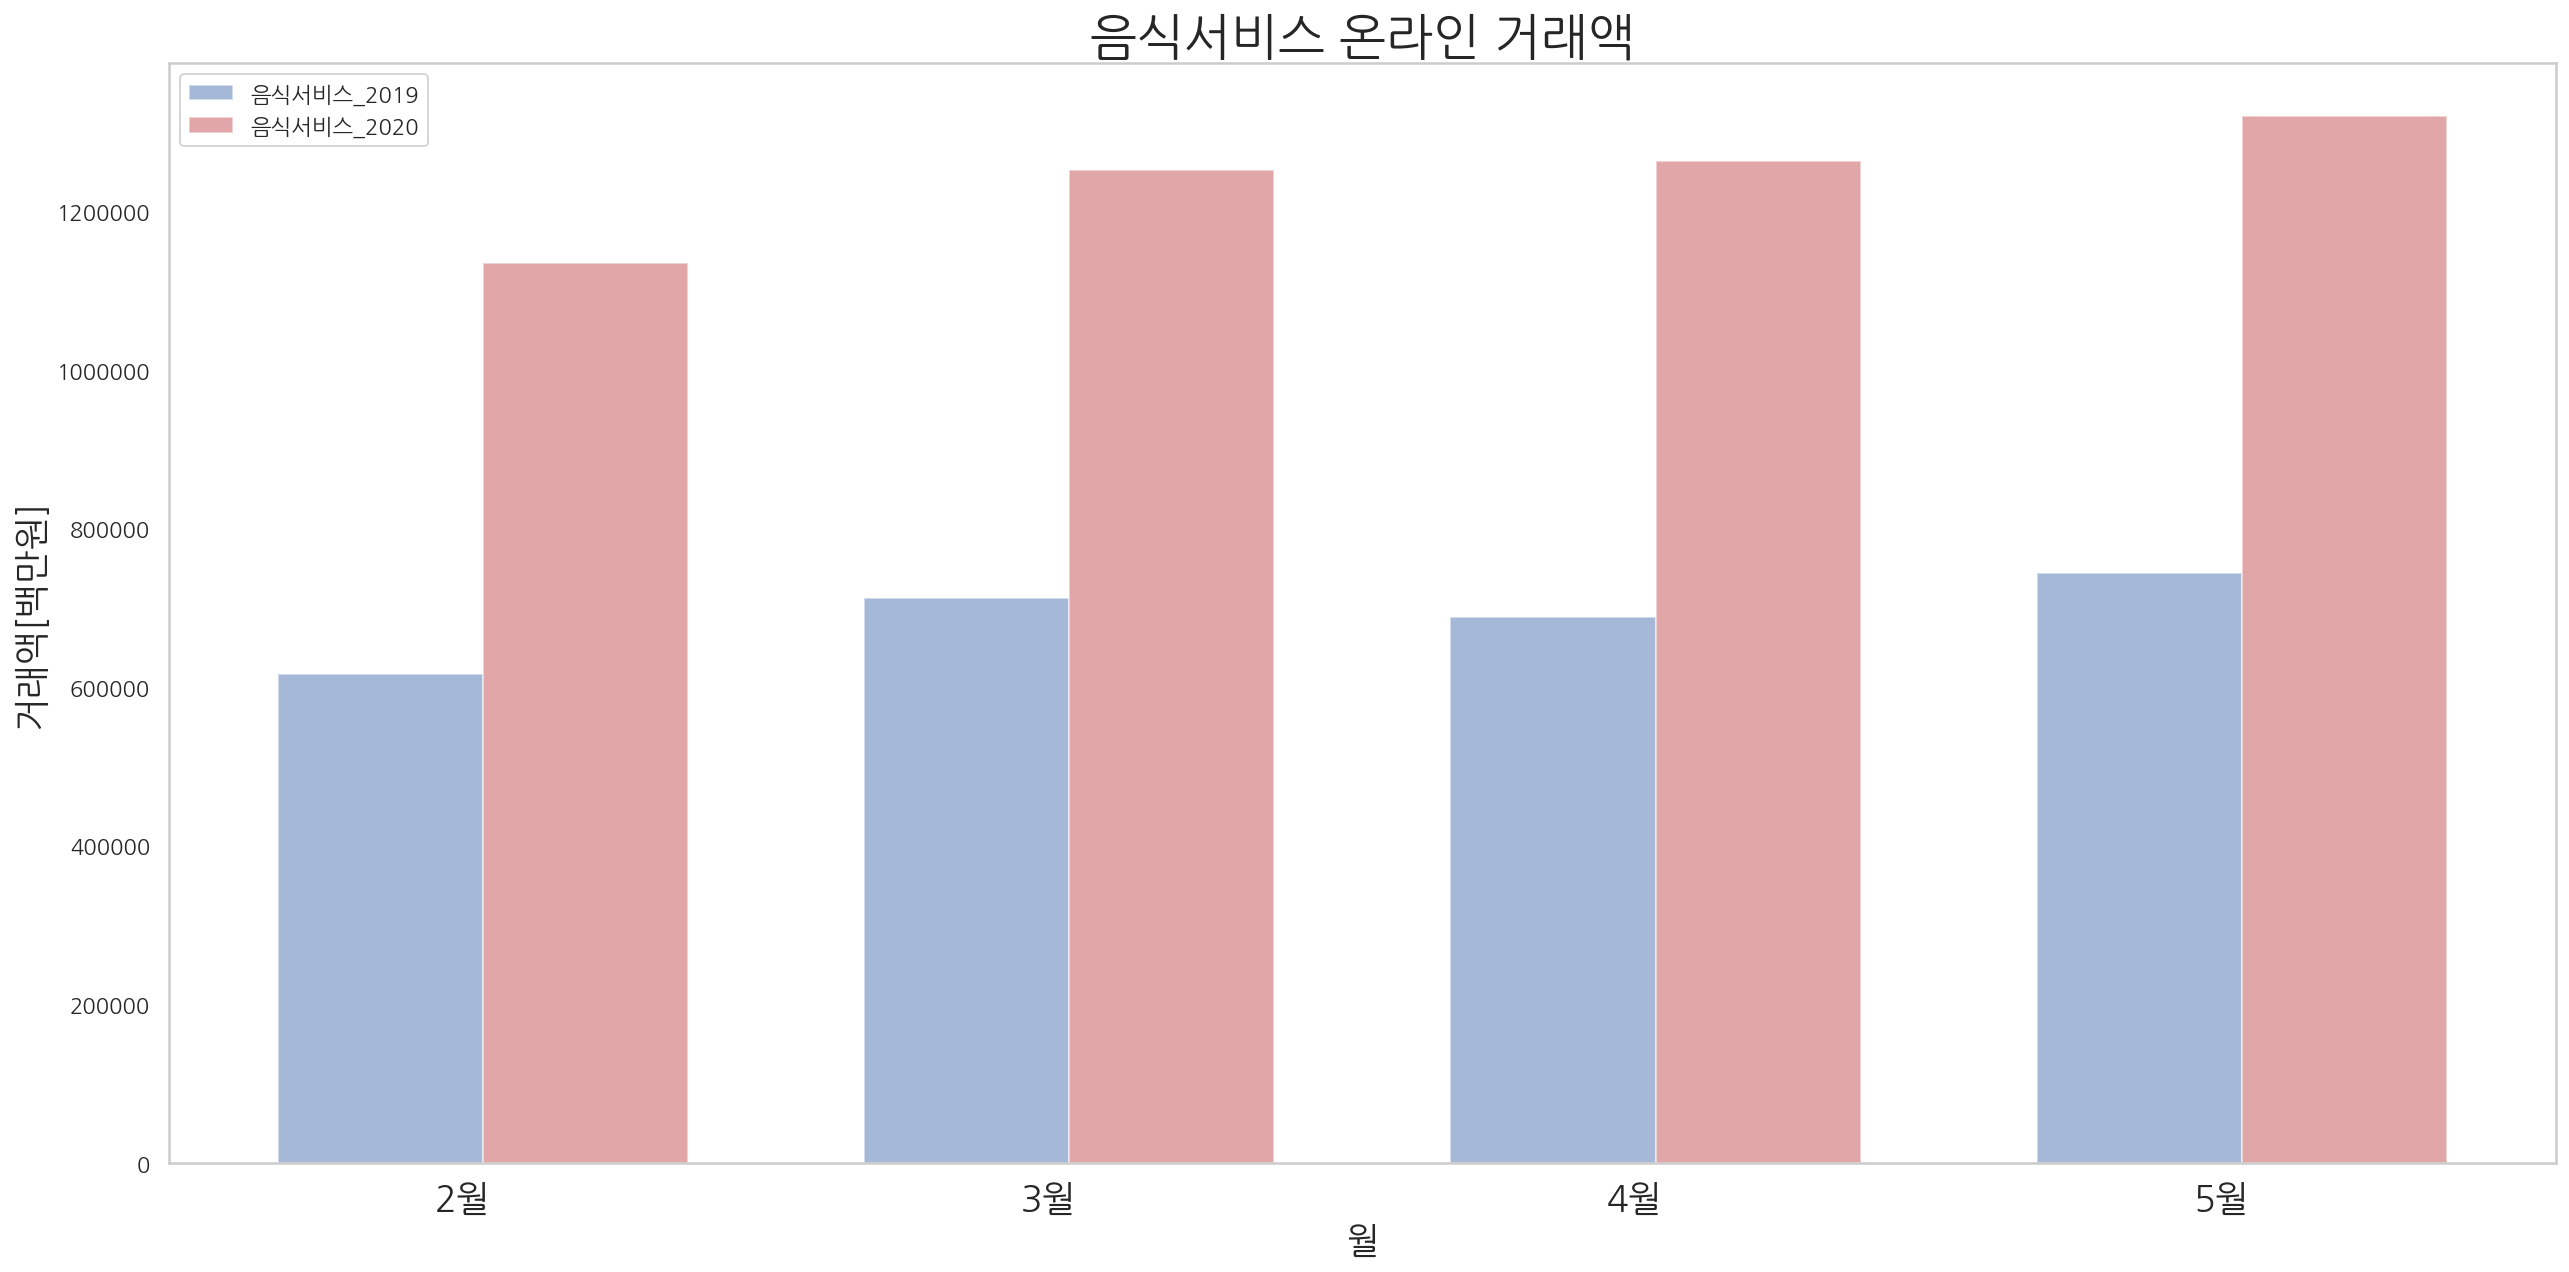

In [295]:
plt_online_food(4, 5, "음식서비스")

- 음·식료품, 농축수산물, 음식서비스(배달) 모두 작년 동월대비 거래액이 증가했습니다.

##### 식료품별 전년대비 월별 증감률 변화 시각화

In [271]:
# 증감액 / 증감률 data 추가
online_food["음·식료품_증감액"] = online_food["음·식료품_2020"]-online_food["음·식료품_2019"]
online_food["농축수산물_증감액"] = online_food["농축수산물_2020"]-online_food["농축수산물_2019"]
online_food["음식서비스_증감액"] = online_food["음식서비스_2020"]-online_food["음식서비스_2019"]
online_food["음·식료품_증감률(%)"] = online_food["음·식료품_증감액"]/online_food["음·식료품_2019"]*100
online_food["농축수산물_증감률(%)"] = online_food["농축수산물_증감액"]/online_food["농축수산물_2019"]*100
online_food["음식서비스_증감률(%)"] = online_food["음식서비스_증감액"]/online_food["음식서비스_2019"]*100

In [272]:
online_food

,음·식료품_2019,음·식료품_2020,농축수산물_2019,농축수산물_2020,음식서비스_2019,음식서비스_2020,음·식료품_증감액,농축수산물_증감액,음식서비스_증감액,음·식료품_증감률(%),농축수산물_증감률(%),음식서비스_증감률(%)
연도,,,,,,,,,,,,
2월,867779,1481513,221292,448870,616842,1135018,613734,227578,518176,70.7247,102.841,84.0047
3월,1026995,1631491,265904,517150,712110,1251923,604496,251246,539813,58.8607,94.4875,75.8047
4월,1059837,1520093,271458,468172,687613,1263018,460256,196714,575405,43.4271,72.4657,83.6815
5월,1108562,1477572,269992,416900,743966,1320396,369010,146908,576430,33.2873,54.412,77.4807


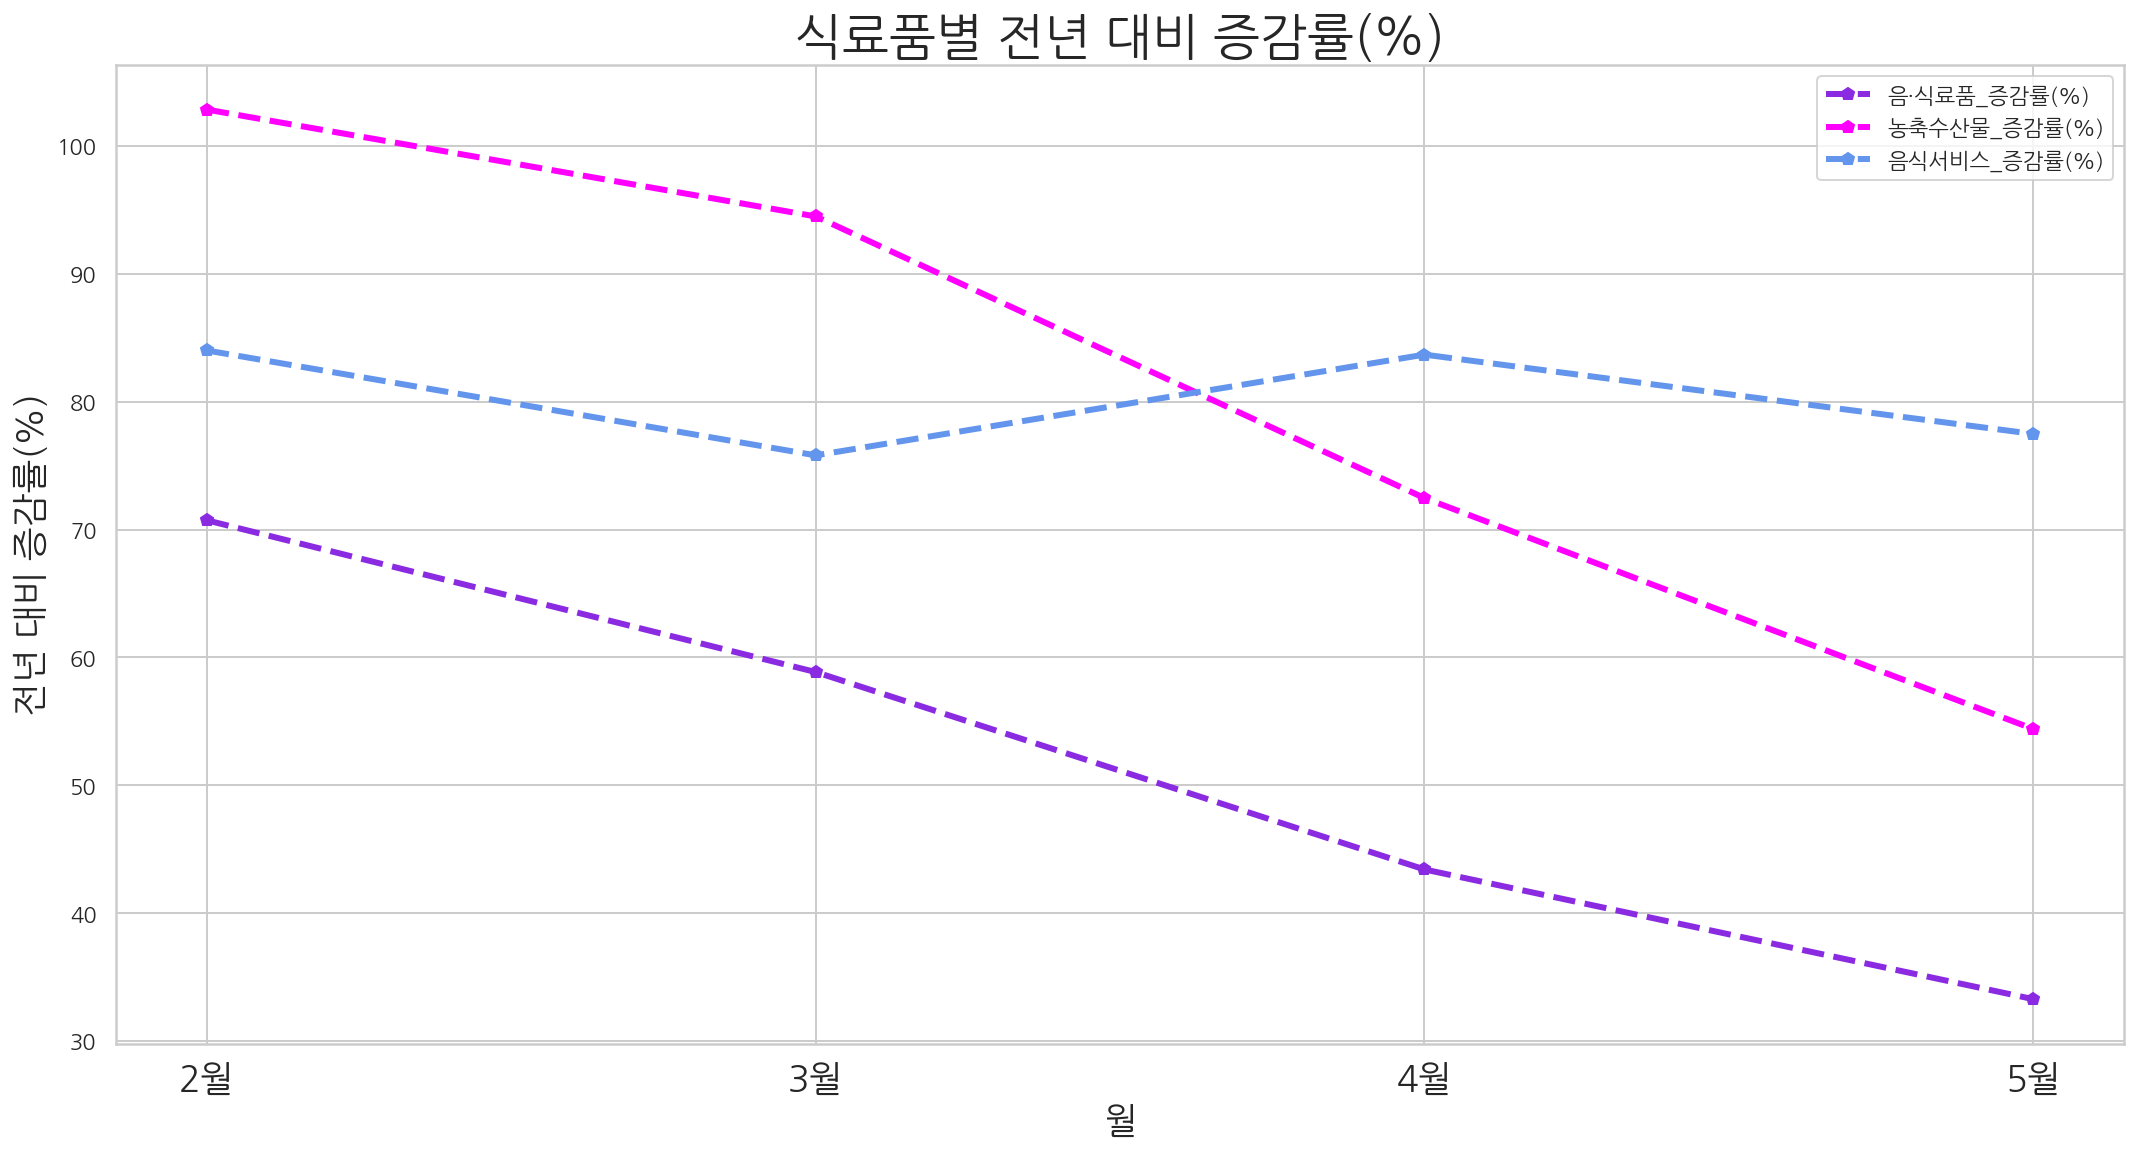

In [296]:
# 전년 대비 증감률 월별 변화량 그래프
plt.figure(figsize=(18,9))

plt.plot(online_food.index, online_food["음·식료품_증감률(%)"], color="blueviolet", linestyle="--", marker="p", 
         linewidth=3.0, label="음·식료품_증감률(%)")
plt.plot(online_food.index, online_food["농축수산물_증감률(%)"], color="fuchsia",linewidth=3.0, linestyle="--", marker="p",
         label="농축수산물_증감률(%)")
plt.plot(online_food.index, online_food["음식서비스_증감률(%)"], color="cornflowerblue", linewidth=3.0, linestyle="--", marker="p",
         label="음식서비스_증감률(%)")

plt.xticks(online_food.index, fontsize=18)
plt.title("식료품별 전년 대비 증감률(%)", fontsize=25)
plt.xlabel("월", fontsize=18)
plt.ylabel("전년 대비 증감률(%)", fontsize=18)
plt.legend(loc="upper right")
#plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
#plt.tick_params(axis='both', direction='in', length=3, pad=6, labelsize=14)
#plt.savefig("식료품별 전년 대비 증감량.png", boox_inches='tight')

plt.show()

- 코로나의 여파로 작년 대비 동월 기간 최소 33% 최대 102% 증가한 모습을 보이고 있습니다.
- 음·식료품와 농축수산물의 증가률은 시간이 지나면서 낮아지고 있지만 음식서비스(배달)은 큰 변화 없이 75%~85% 정도의 전년동월비 증가률을 보여 주고 있습니다.